

---


<h3><center>MScFE 690 Capstone</center></h3>
<h3><center>Group 14</center></h3>
<h3><center>Predicting Indian Stock Market Index Movement using Macroeconomic Data and Machine Learning</center></h3>


---

<h3><center>Step 2: Variable and Feature Selection</center></h3>


Following Macroeconomic variables and Indexs are captured and analyzed for this paper are:

*   FII/DII Activity
*   GDP Growth rate
*   Crude Oil
*   Monetary Policy
*   USD/INR Exchange rates
*   US Global and Indian Market Index
*   Industrial Production
*   CPI

In this notebook, we will perform the feature and variables selection over the collected data.

In [14]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Read the input file and set Date as the index
input_data_df = pd.read_csv("indexs_and_macroeconomic_data.csv")
input_data_df = input_data_df.set_index('Date')
input_data_df

,NSE Adj Close,Dow Jones Adj Close,Norm GDP,Brent Crude Price,CPI,IIP,Central Bank Rates,USD INR Rate,FII Net Purchase or Sales,DII Net Purchase or Sales
Date,,,,,,,,,,
1996-05-01,1137.80,5575.220215,100.928058,19.319130,27.196636,34.956089,12.00,34.80,NaN,NaN
1996-06-01,1089.90,5643.180176,100.835625,18.577500,27.611219,34.513567,12.00,35.23,NaN,NaN
1996-07-01,1109.00,5729.979980,100.743785,19.714783,28.108718,34.114211,12.00,35.10,NaN,NaN
1996-08-01,1036.60,5594.750000,100.653025,20.605909,28.440385,34.920563,12.00,35.65,NaN,NaN
1996-09-01,1029.00,5616.209961,100.563376,23.081429,28.523301,34.590072,12.00,35.85,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-01-01,17354.05,36338.300781,99.574644,85.622381,137.830179,119.009911,4.25,74.39,-35493.59,31231.05
2022-02-01,17576.85,35405.238281,99.517528,94.267000,137.720003,117.988724,4.25,74.78,-41346.35,21928.40
2022-03-01,16793.90,33294.949219,99.423298,112.440000,138.821763,119.245588,4.25,75.79,-45720.07,42084.07


## Exploratory Data Analysis

In [16]:
# Checking the columns with null values
input_data_df.isnull().sum()

NSE Adj Close                  0
Dow Jones Adj Close            0
Norm GDP                       0
Brent Crude Price              0
CPI                            0
IIP                            0
Central Bank Rates             0
USD INR Rate                   0
FII Net Purchase or Sales    132
DII Net Purchase or Sales    132
dtype: int64



---


**Summary**

As can be seen in the above output cell, there are some missing values in the input data. This is because the 'DII' and 'FII' spending data is unavailable for years below 2007.


In [17]:
# Double check to confirm that the input data has no duplicates
input_data_df = input_data_df.dropna()
if input_data_df.duplicated().sum() == 0:
  print("There are no duplicates in input data. Continuing...")
else:
  print("There are duplicates in input data. Please correct it.")

There are no duplicates in input data. Continuing...


In [18]:
# Verify if the dtypes are parsed
input_data_df.dtypes

NSE Adj Close                float64
Dow Jones Adj Close          float64
Norm GDP                     float64
Brent Crude Price            float64
CPI                          float64
IIP                          float64
Central Bank Rates           float64
USD INR Rate                 float64
FII Net Purchase or Sales    float64
DII Net Purchase or Sales    float64
dtype: object

In [19]:
# Describe data
input_data_df.describe()

,NSE Adj Close,Dow Jones Adj Close,Norm GDP,Brent Crude Price,CPI,IIP,Central Bank Rates,USD INR Rate,FII Net Purchase or Sales,DII Net Purchase or Sales
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,8166.943370,18501.620940,99.890944,77.471872,94.100250,98.503221,6.594378,59.406098,-511.053646,2841.688011
std,3605.966426,7491.544875,2.293960,25.869428,26.512418,13.955254,1.542276,11.376413,15426.468216,11541.556614
min,2682.900000,7062.930176,83.381190,26.848636,49.346509,49.610620,2.250000,39.120000,-65816.700000,-48319.170000
25%,5290.500000,12654.360352,99.298003,56.524545,70.768250,89.841033,6.000000,48.580000,-6819.800000,-2998.270000
50%,7713.000000,16804.710938,100.133364,73.851304,96.780363,98.093043,6.000000,62.140000,-85.140000,2190.660000
75%,10458.350000,24635.210938,101.203814,103.358500,115.141855,111.206800,7.750000,68.460000,7864.360000,7991.110000
max,17929.650000,36338.300781,101.937821,133.585217,142.127043,123.978391,10.250000,76.480000,65317.130000,55595.180000


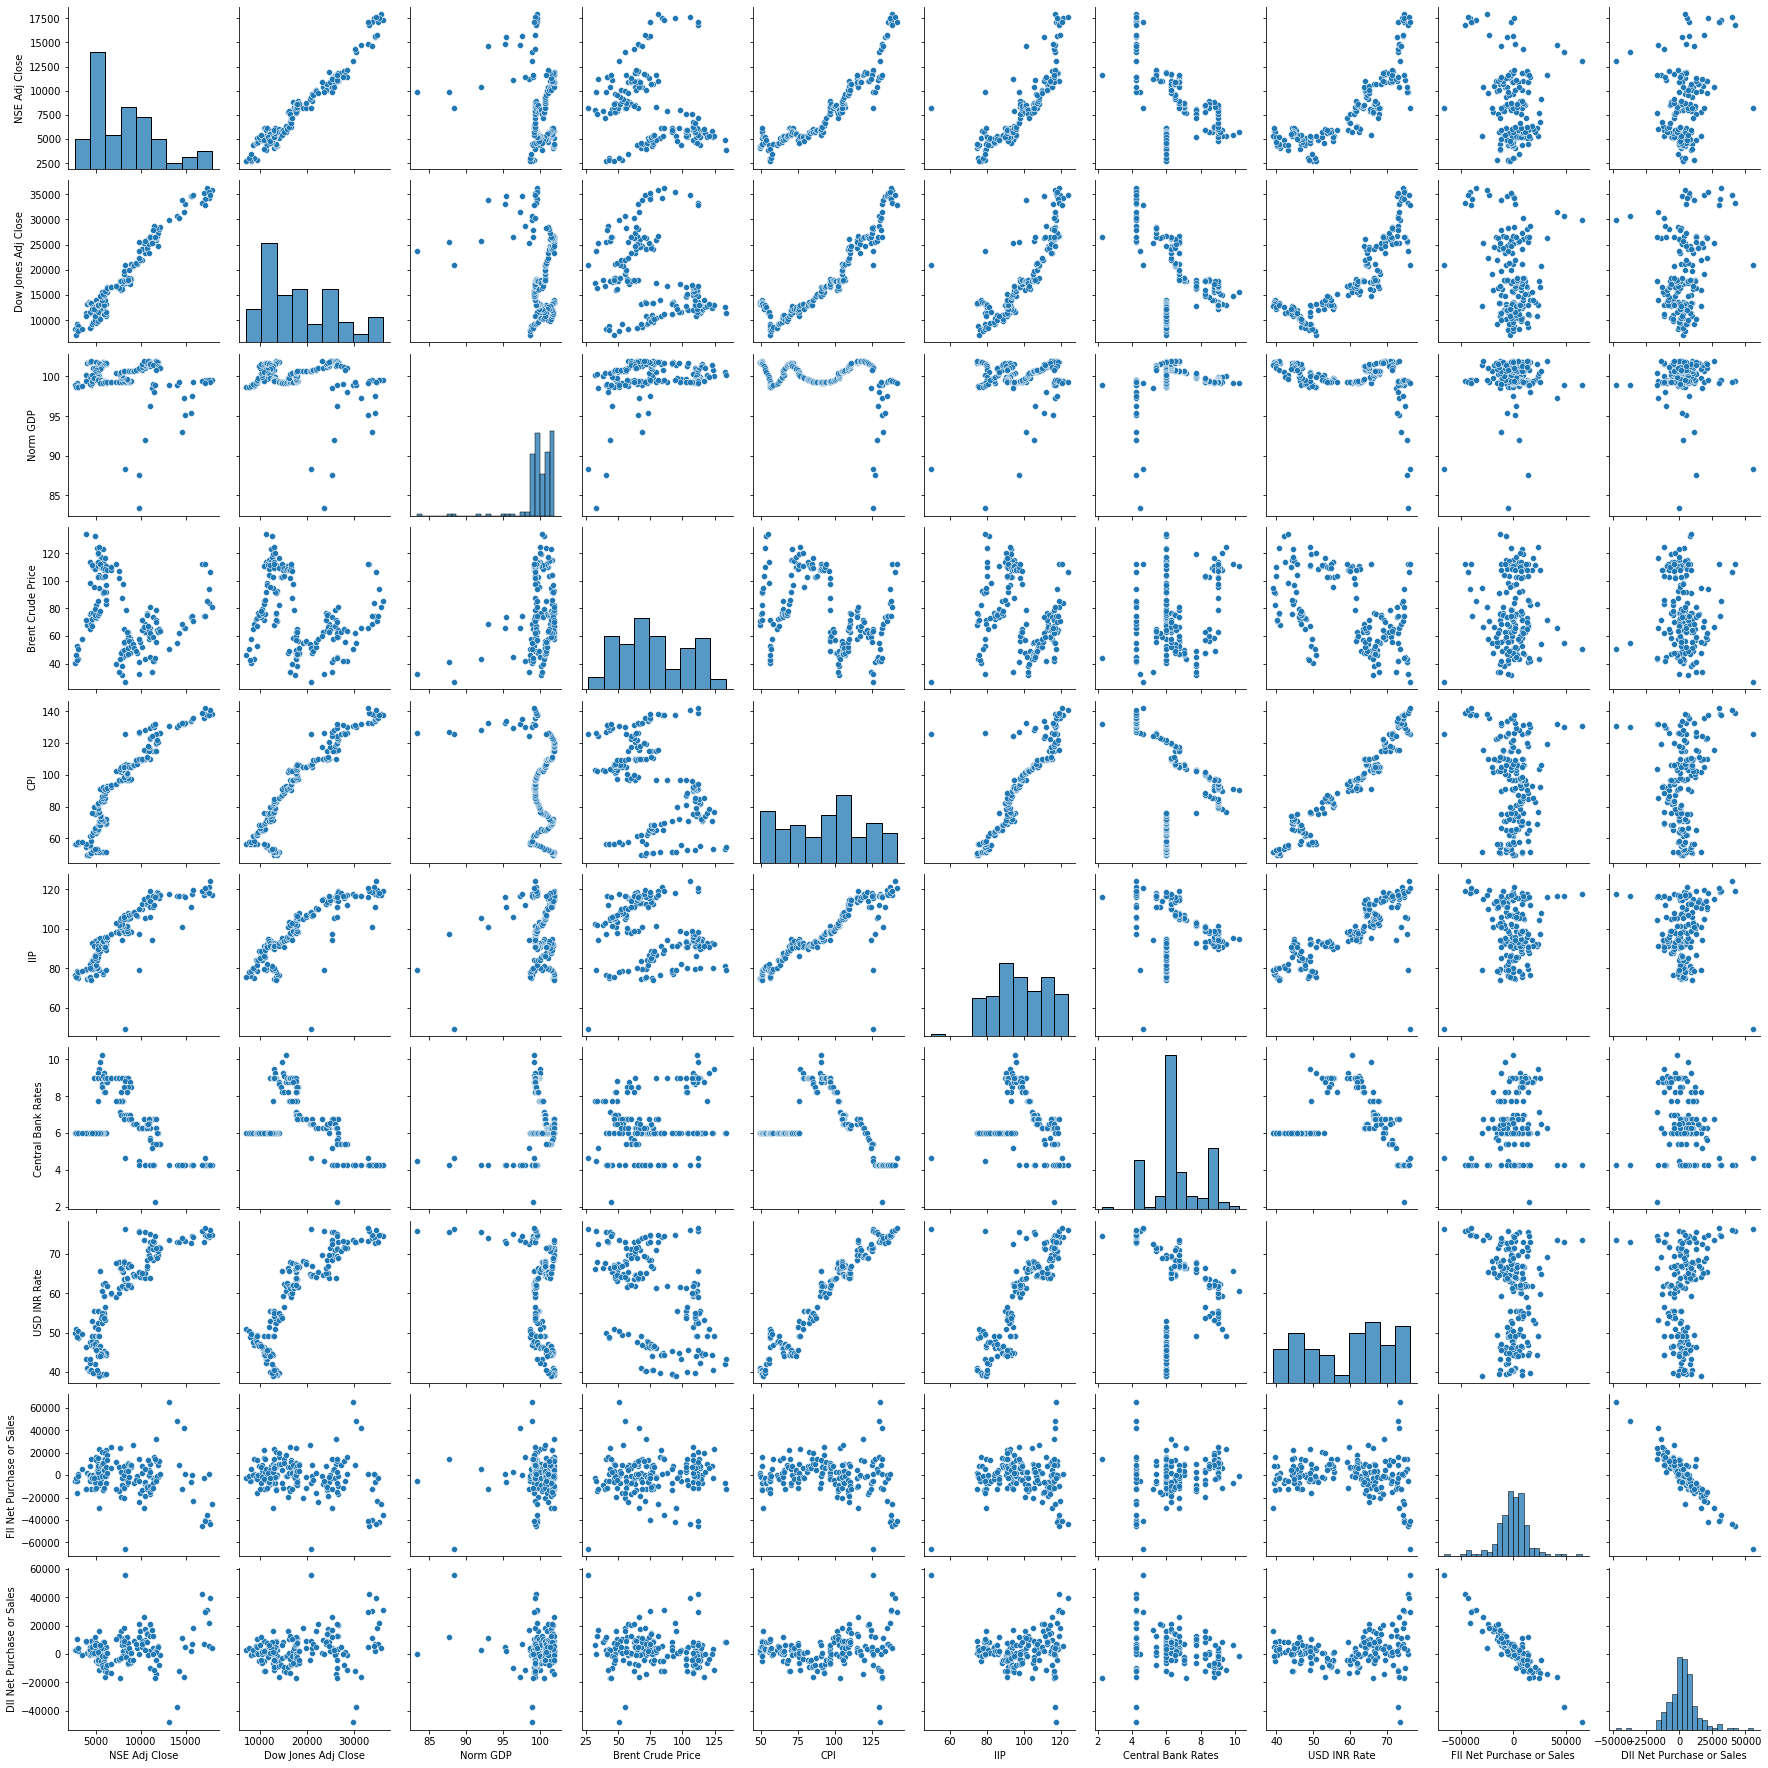

In [20]:
# Pair plot the data for more visibility
sns.pairplot(input_data_df)



---


# Univariate Analysis and Visualizing Outliers

In [21]:
# Custom function for easy and efficient analysis of numerical univariate

def data_plot(data_, var_group):
    size = len(var_group)
    plt.figure(figsize = (7*size, 3), dpi = 100)
  
    #looping for each variable
    for j, i in enumerate(var_group):
        plt.subplot(1, size, j+1)
        plt.plot(data_.index, data_[i])
        plt.xlabel('{}'.format(i), fontsize = 20)


def UVA_numeric(data_, var_group):
    size = len(var_group)
    plt.figure(figsize = (7*size, 3), dpi = 100)
  
    #looping for each variable
    for j,i in enumerate(var_group):
    
        # calculating descriptives of variable
        mini = data_[i].min()
        maxi = data_[i].max()
        ran = data_[i].max()-data_[i].min()
        mean = data_[i].mean()
        median = data_[i].median()
        st_dev = data_[i].std()
        skew = data_[i].skew()
        kurt = data_[i].kurtosis()

        # calculating points of standard deviation
        points = mean-st_dev, mean+st_dev

        #Plotting the variable with every information
        plt.subplot(1, size, j+1)
        sns.kdeplot(x = data_[i], shade = True)
        sns.lineplot(x = points, y=[0,0], color = 'black', label = "std_dev")
        sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max")
        sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
        sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
        plt.xlabel('{} Distribution'.format(i), fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))


def boxPlot(data_, var_group):
    size = len(var_group)
    plt.figure(figsize = (7*size,3), dpi = 100)

    #looping for each variable
    for j,i in enumerate(var_group):

        #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        ax = sns.boxplot(x = data_[i])
        plt.xlabel('{} Boxplot'.format(i), fontsize = 20)

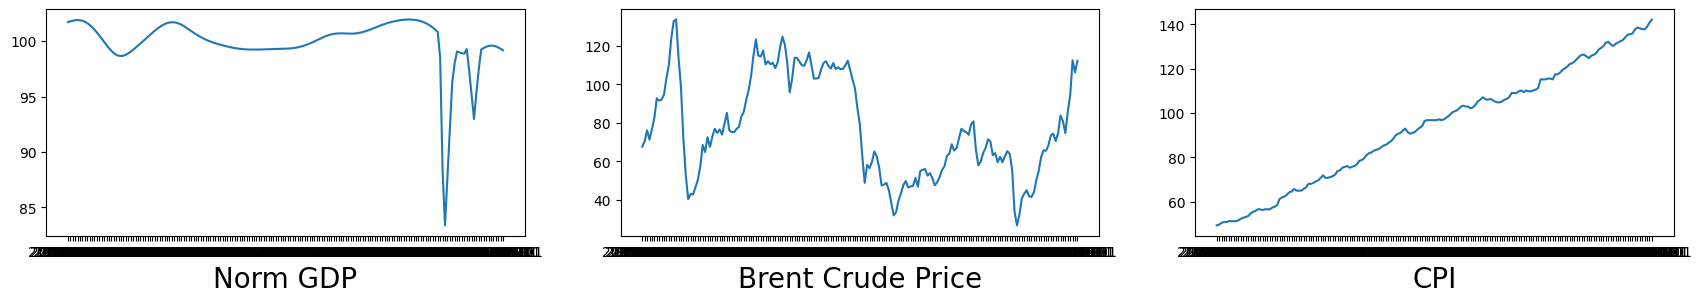

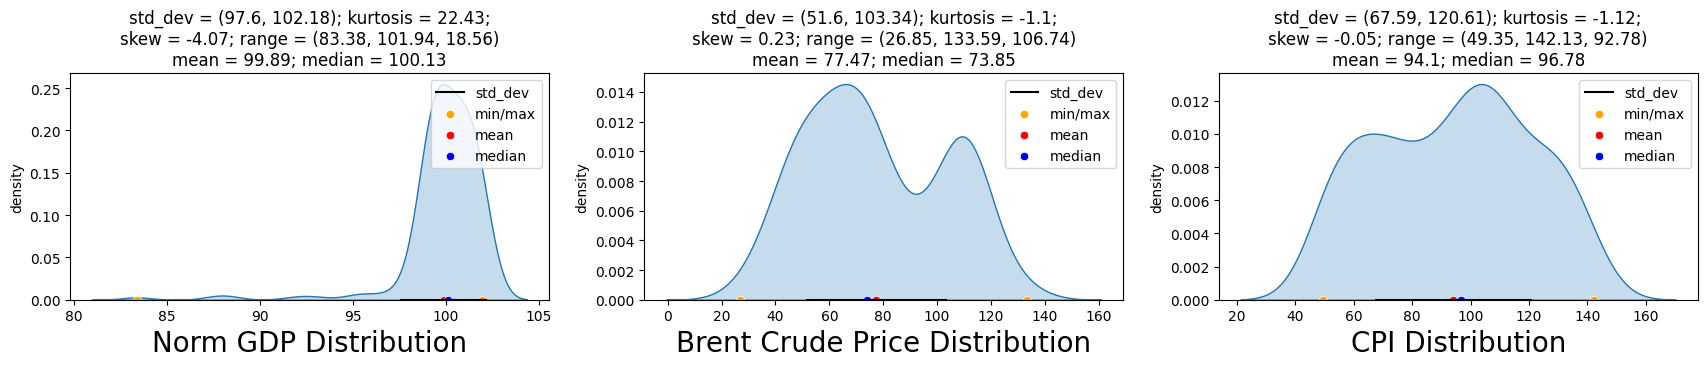

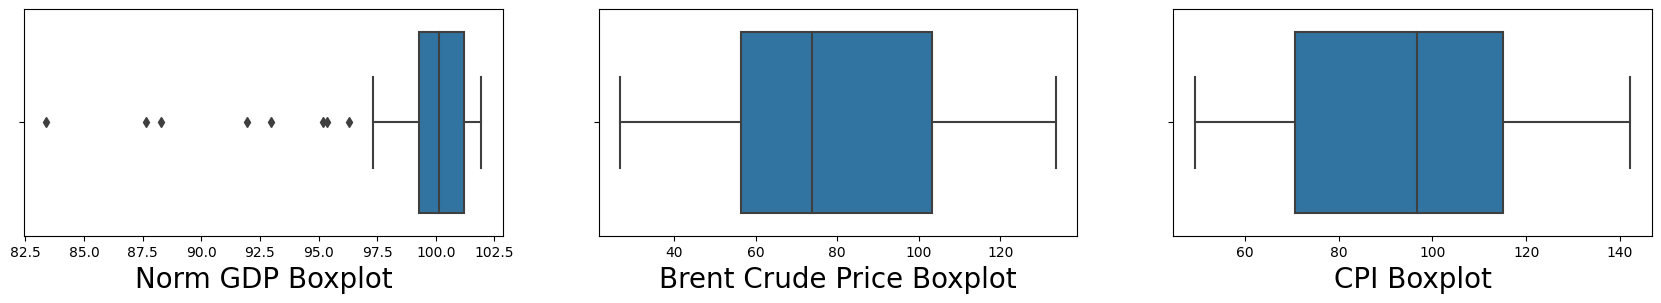

In [22]:
# Visualizing the data
data_plot(input_data_df, ['Norm GDP',"Brent Crude Price","CPI"])
UVA_numeric(input_data_df, ['Norm GDP',"Brent Crude Price","CPI"])
boxPlot(input_data_df, ['Norm GDP',"Brent Crude Price","CPI"])

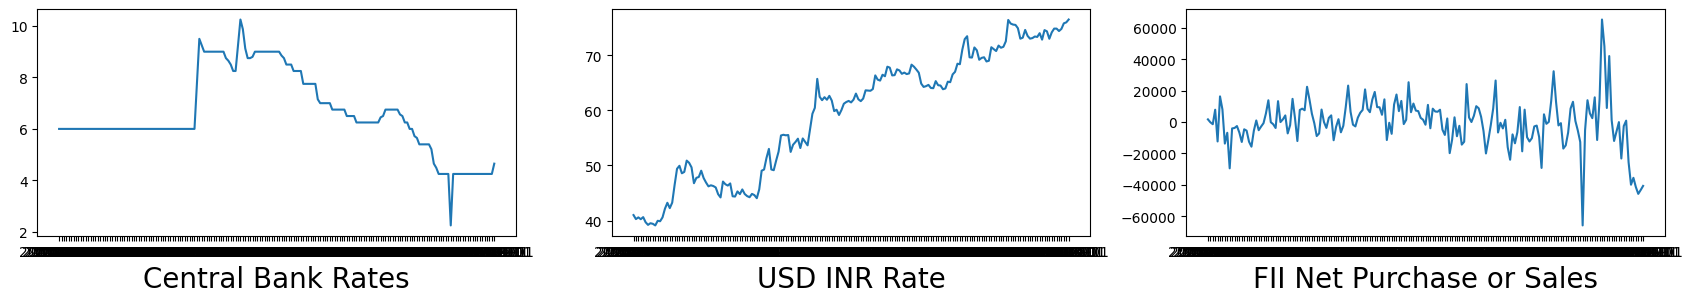

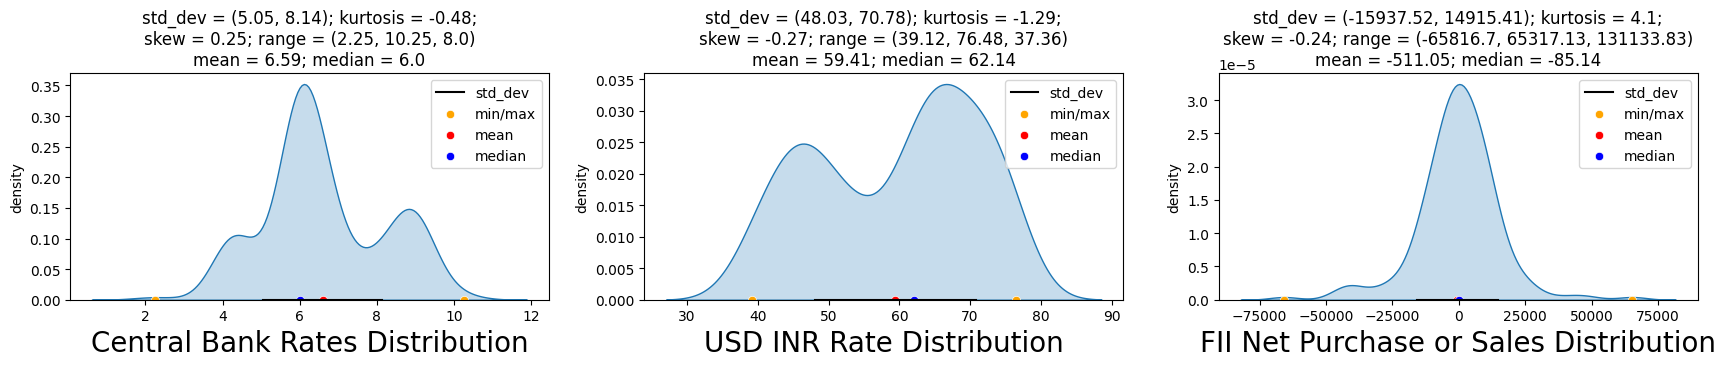

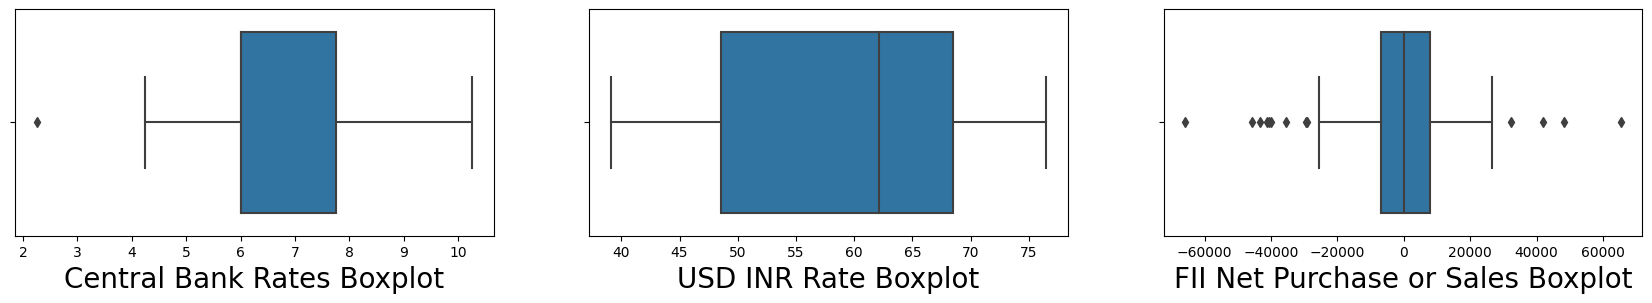

In [23]:
data_plot(input_data_df, ["Central Bank Rates", "USD INR Rate",	"FII Net Purchase or Sales"])       
UVA_numeric(input_data_df, ["Central Bank Rates", "USD INR Rate",	"FII Net Purchase or Sales"])
boxPlot(input_data_df, ["Central Bank Rates", "USD INR Rate",	"FII Net Purchase or Sales"])

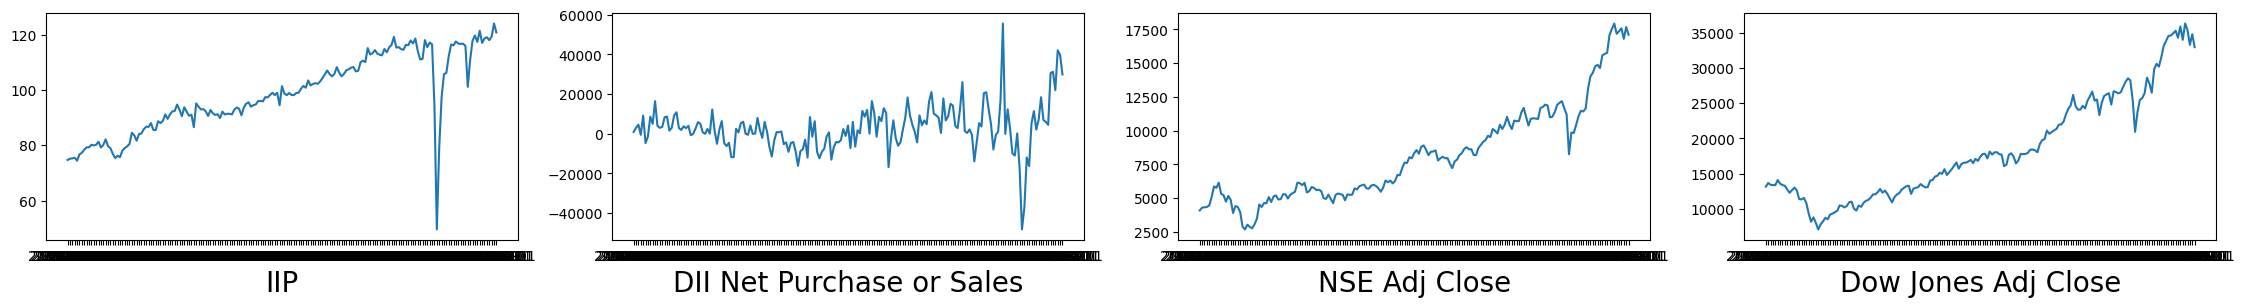

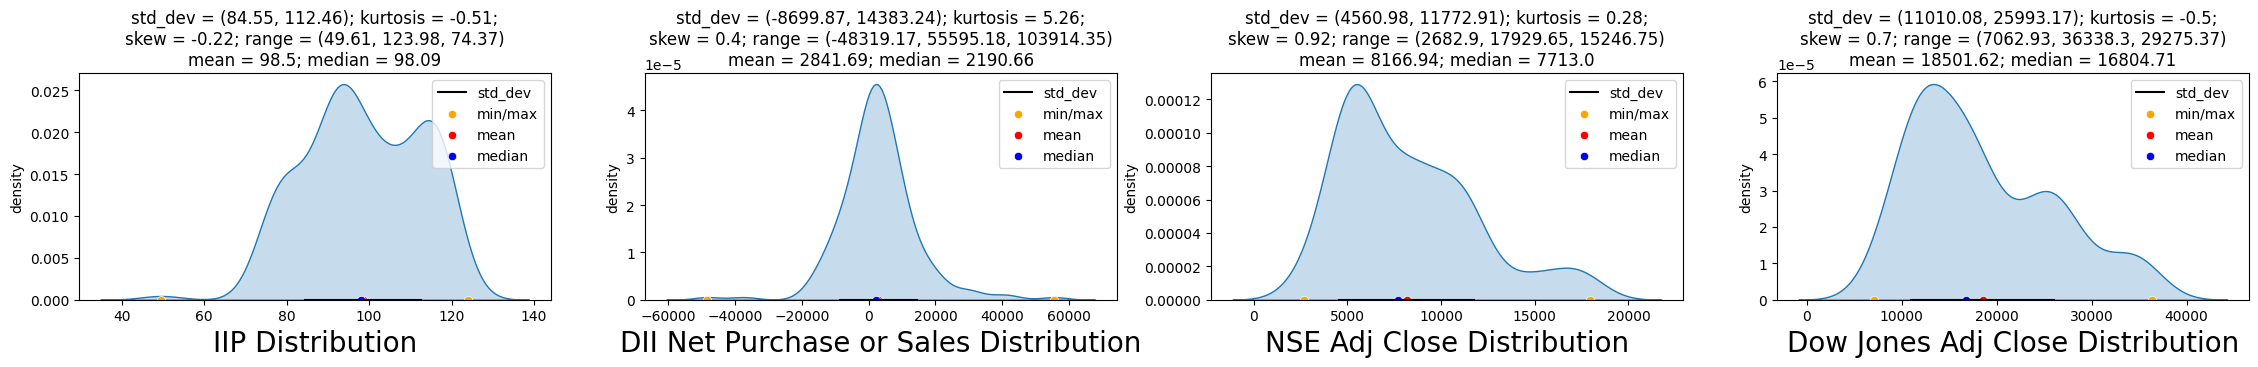

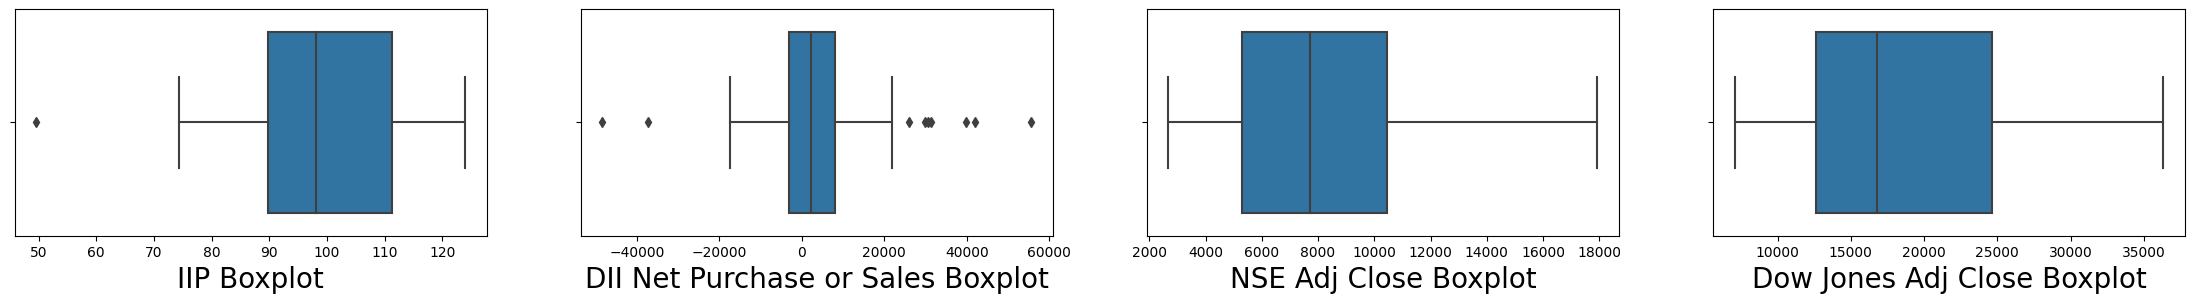

In [24]:
data_plot(input_data_df, ["IIP",	"DII Net Purchase or Sales", "NSE Adj Close", "Dow Jones Adj Close"])
UVA_numeric(input_data_df, ["IIP",	"DII Net Purchase or Sales", "NSE Adj Close", "Dow Jones Adj Close"])
boxPlot(input_data_df, ["IIP",	"DII Net Purchase or Sales", "NSE Adj Close", "Dow Jones Adj Close"])



---

